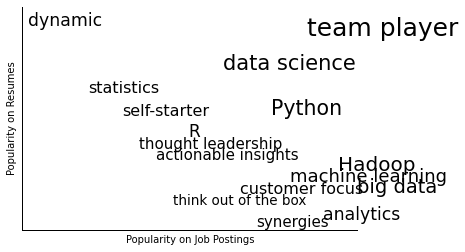

In [18]:
""" We'll call this chapter "Baby Steps in Natural Language Processing" """
%matplotlib inline
from matplotlib import pyplot as plt


data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
     ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
     ("data science", 60, 70), ("analytics", 90, 3),
     ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
     ("actionable insights", 40, 30), ("think out of the box", 45, 10),
     ("self-starter", 30, 50), ("customer focus", 65, 15),
     ("thought leadership", 35, 35)]


def text_size(total):
    """ custom text size settings """
    return 8 + total / 200 * 20


def simple_meaningful_word_cloud(data):
    fig, ax = plt.subplots(nrows=1)
    
    for word, job_popularity, resume_popularity in data:
        plt.text(job_popularity, resume_popularity, word, ha='left', va='bottom',
                 size=text_size(job_popularity + resume_popularity))

    plt.xlabel("Popularity on Job Postings")
    plt.ylabel("Popularity on Resumes")
    plt.axis([0, 100, 0, 100])
    plt.xticks([])
    plt.yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()


simple_meaningful_word_cloud(data)

In [41]:
""" n-gram Models and BeautifulSoup """
from bs4 import BeautifulSoup
from collections import defaultdict
from random import choice
import re
import requests


def fix_unicode(text):
    return text.replace(u"\u2019", "'")


In [36]:
url = "http://dagonbytes.com/thelibrary/lovecraft/thecallofcthulhu.htm"
html = requests.get(url).text
soup = BeautifulSoup(html)
content = soup.find("body").find_all("table")[2]
regex = r"[\w']+|[\.]"

document = []

for paragraph in content("p"):
    words = re.findall(regex, fix_unicode(paragraph.text))
    document.extend(words)

In [38]:
print(document[:10])
print(len(document))

['Of', 'such', 'great', 'powers', 'or', 'beings', 'there', 'may', 'be', 'conceivably']
12371


In [44]:
bigrams = zip(document, document[1:])
transitions = defaultdict(list)
for prev, current in bigrams:
    transitions[prev].append(current)


def generate_using_bigrams():
    """ Generate a single sentence from a set of bigrams. """
    # this way the first word is the start of a sentence
    current = '.'
    result = []
    
    while True:
        next_word_candidates = transitions[current]
        current = choice(next_word_candidates)
        if current == '.':
            return " ".join(result) + '.'
        result.append(current)

In [46]:
def generate_bigram_paragraph(n):
    result = []
    for _ in range(n):
        result.append(generate_using_bigrams())
    return ' '.join(result)


print(generate_bigram_paragraph(4))

The Emma landed at the greenish stone blocks at once more. He questioned and my connexion that he oddly said that may die till the full of ten scaffolds set of truth when I correlated will institute an acrid and occultism went to sinister with some time of the hellish outlines had ever trod before death found that part of his genius and bring the theosophical and boxes to churn the storm had quickly instituted a post facto diary and the virtual identity of that time forward so carefully tore and now They had called himself and down or system of ruthlessness brought against his night in all the old sea bottoms. Scott Elliot's Atlantis and won the tainted outside must be approached by design. He is no slight earthquake tremor the men an attic window after cycles of monster or mineralogy.


In [47]:
trigrams = zip(document, document[1:], document[2:])
trigram_transitions = defaultdict(list)
starts = []

for prev, current, nxt in trigrams:
    if prev == ".":
        starts.append(current)
    
    trigram_transitions[(prev, current)].append(nxt)


def gen_using_trigrams():
    current = choice(starts)
    prev = "."
    result = [current]
    
    while True:
        next_word_candidates = trigram_transitions[(prev, current)]
        next_word = choice(next_word_candidates)
        prev, current = current, next_word
        if current == ".":
            return " ".join(result) + "."
        result.append(current)


In [51]:
print(gen_using_trigrams())
print('\n')
print(gen_using_trigrams())
print('\n')
print(gen_using_trigrams())

Animal fury and orgiastic license here whipped themselves to daemoniac heights by howls and squawking ecstacies that tore and reverberated through those nighted woods like pestilential tempests from the immensely aged mestizo named Castro who claimed to have varied but he must at the terrible statue I now beheld so that the world seem recent and transient indeed.


Johansen's address I discovered lay in the cycle of eternity.


Might not the secret cult would never die till the stars were right They could plunge from world to world through the sky.
